# <center> <font color=#B40404>Supervised Learning Project</center>
    
## <center> <font color=#B40404>Submitted by Utathya Ghosh</center>
    
### <center> <font color=#B40404>Batch - AIML Online Jan 21-A</center>

# <center>PART TWO</center>
# <center>PROJECT BASED</center>
# <center>TOTAL SCORE - 30</center>

• DOMAIN: Banking and finance

• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee 
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the 
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an 
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing 
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit 
with same budget as per last campaign. 

• DATA DESCRIPTION: The data consists of the following attributes: 

1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

• PROJECT OBJECTIVE: Build an AIML model to perform focused marketing by predicting the potential customers who will 
convert using the historical dataset.
 Steps and tasks: [ Total Score: 30 points ]

In [1]:
# Loading the required libraries in one place
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
from scipy.stats import ttest_ind, shapiro, chi2_contingency
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

#### 1. Import and warehouse data:
##### • Import all the given datasets and explore shape and size of each.

In [2]:
# Reading the csv file into dataframe

# Error handling for missing Data1 dataset csv
# Running a loop till correct file has been found
while(True):
    try:
        # Reading the desired dataset into desired df_ tagged variable
        df_data1 = pd.read_csv("Part2 - Data1.csv")
        # Leaving loop if file found
        break
    except OSError as e:

        # Provide instructions if file not found
        file_path = os.path.join(os.path.abspath(''))
        print("Please place the file named <Part2 - Data1.csv> at the path", file_path)
        # Waiting for user input to check again, Actual verification of what user has inputted is inconsequential
        input("System waits: Have you placed the correct files in path? (Input 'Y' for Yes)")
        
# Error handling for missing Data2 dataset csv
# Running a loop till correct file has been found
while(True):
    try:
        # Reading the desired dataset into desired df_ tagged variable
        df_data2 = pd.read_csv("Part2 -Data2.csv")
        # Leaving loop if file found
        break
    except OSError as e:

        # Provide instructions if file not found
        file_path = os.path.join(os.path.abspath(''))
        print("Please place the file named <Part2 -Data2.csv> at the path", file_path)
        # Waiting for user input to check again, Actual verification of what user has inputted is inconsequential
        input("System waits: Have you placed the correct files in path? (Input 'Y' for Yes)")

##### • Merge all datasets onto one and explore final shape and size.

In [3]:
# Merging all datsets into one master dataset
df_master = pd.concat([df_data1, df_data2], axis=1)

# Displaying master dataset shape and size
print("Shape of Combined dataset: ", df_master.shape)
print("Size of Combined dataset: ", df_master.size)

Shape of Combined dataset:  (5000, 15)
Size of Combined dataset:  75000


#### 2. Data cleansing:
##### • Explore and if required correct the datatypes of each attribute

In [4]:
# Displaying the attribute data information
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   ID                   5000 non-null   int64  
 9   Mortgage             5000 non-null   int64  
 10  Security             5000 non-null   int64  
 11  FixedDepositAccount  5000 non-null   int64  
 12  InternetBanking      5000 non-null   int64  
 13  CreditCard           5000 non-null   int64  
 14  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(13)
memory usage:

##### <font color=#B40404>Based on information shared by the client we can identify some anomalies in data type

###### <font color=#B40404>ZipCode - This is an identifying number but it is neither an ordinal nor ratio data. So it will be converted to object or text type
###### <font color=#B40404>ID - It is a redundant column thanks to dataframe index and should be dropped.

##### <font color=#B40404>Some other attributes are actually Boolean in type but since it is represented as 1 and 0 hence marked as int or float, since this helps operations down the line we will convert all Boolean attributes to object type. These attributes are :-

###### <font color=#B40404>Security - This is a Binary type and will be converted to object
###### <font color=#B40404>FixedDepositAccount - This is a Binary type and will be converted to object
###### <font color=#B40404>InternetBanking - This is a Binary type and will be converted to object
###### <font color=#B40404>CreditCard - This is a Binary type and will be converted to object
###### <font color=#B40404>LoanOnCard - This is a Binary type and will be converted to object
###### <font color=#B40404>HiddenScore - This has 4 levels and will be converted to object
###### <font color=#B40404>Level - This has 3 levels and will be converted to object

In [5]:
# Making the required corrections to dataset
# Converting ZipCode to Object since it is categorical in nature
df_master["ZipCode"] = df_master["ZipCode"].astype('object')

# Dropping ID column
df_master.drop("ID", inplace=True, axis=1)

# Converting LoanOnCard attribute to object form for convenience and symmetry
df_master["LoanOnCard"] = df_master["LoanOnCard"].astype('object', errors='ignore')

# Converting categorical attributes to object form for convenience and symmetry
df_master["Security"] = df_master["Security"].astype('object', errors='ignore')
df_master["FixedDepositAccount"] = df_master["FixedDepositAccount"].astype('object', errors='ignore')
df_master["InternetBanking"] = df_master["InternetBanking"].astype('object', errors='ignore')
df_master["CreditCard"] = df_master["CreditCard"].astype('object', errors='ignore')
df_master["HiddenScore"] = df_master["HiddenScore"].astype('object', errors='ignore')
df_master["Level"] = df_master["Level"].astype('object', errors='ignore')


# Redisplaying the attribute data information
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   object 
 4   HiddenScore          5000 non-null   object 
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   object 
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   object 
 9   FixedDepositAccount  5000 non-null   object 
 10  InternetBanking      5000 non-null   object 
 11  CreditCard           5000 non-null   object 
 12  LoanOnCard           4980 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 507.9+ KB


##### • Explore for null values in the attributes and if required drop or impute values.

###### <font color=#B40404>Null values are all found in the target variable "LoanOnCard". Hence dropping is the only option as we do not want to impute on target variable

In [6]:
# Finding and dropping null values
df_master.dropna(inplace=True)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4980 non-null   int64  
 1   CustomerSince        4980 non-null   int64  
 2   HighestSpend         4980 non-null   int64  
 3   ZipCode              4980 non-null   object 
 4   HiddenScore          4980 non-null   object 
 5   MonthlyAverageSpend  4980 non-null   float64
 6   Level                4980 non-null   object 
 7   Mortgage             4980 non-null   int64  
 8   Security             4980 non-null   object 
 9   FixedDepositAccount  4980 non-null   object 
 10  InternetBanking      4980 non-null   object 
 11  CreditCard           4980 non-null   object 
 12  LoanOnCard           4980 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 544.7+ KB


#### 3. Data analysis & visualisation:
##### • Perform detailed statistical analysis on the data.

###### <font color=#B40404>For All records on LoanOnCard

In [153]:
# Look through basic stats on the dataset for Asset clients
df_master[df_master["LoanOnCard"] == 1].describe(include='all')

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,480.000000,480.000000,480.000000,480.0,480.0,480.000000,480.0,480.000000,480.0,480.0,480.0,480.0,480.0
unique,NaN,NaN,NaN,238.0,4.0,NaN,3.0,NaN,2.0,2.0,2.0,2.0,1.0
top,NaN,NaN,NaN,94720.0,4.0,NaN,3.0,NaN,0.0,0.0,1.0,0.0,1.0
freq,NaN,NaN,NaN,19.0,134.0,NaN,205.0,NaN,420.0,340.0,291.0,337.0,480.0
mean,45.066667,19.843750,144.745833,NaN,NaN,3.905354,NaN,100.845833,NaN,NaN,NaN,NaN,NaN
std,11.590964,11.582443,31.584429,NaN,NaN,2.097681,NaN,160.847862,NaN,NaN,NaN,NaN,NaN
min,26.000000,0.000000,60.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,35.000000,9.000000,122.000000,NaN,NaN,2.600000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,45.000000,20.000000,142.500000,NaN,NaN,3.800000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,55.000000,30.000000,172.000000,NaN,NaN,5.347500,NaN,192.500000,NaN,NaN,NaN,NaN,NaN


###### <font color=#B40404>For All records which are not on LoanOnCard

In [7]:
# Look through basic stats on the dataset for depositor clients
df_master[df_master["LoanOnCard"] == 0].describe(include='all')

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4500.000000,4500.000000,4500.000000,4500.0,4500.0,4500.000000,4500.0,4500.000000,4500.0,4500.0,4500.0,4500.0,4500.0
unique,NaN,NaN,NaN,467.0,4.0,NaN,3.0,NaN,2.0,2.0,2.0,2.0,1.0
top,NaN,NaN,NaN,94720.0,1.0,NaN,1.0,NaN,0.0,0.0,1.0,0.0,0.0
freq,NaN,NaN,NaN,148.0,1359.0,NaN,1996.0,NaN,4040.0,4338.0,2683.0,3177.0,4500.0
mean,45.383111,20.146889,66.290444,NaN,NaN,1.729849,NaN,51.869111,NaN,NaN,NaN,NaN,NaN
std,11.451489,11.457430,40.611325,NaN,NaN,1.569872,NaN,92.148695,NaN,NaN,NaN,NaN,NaN
min,23.000000,-3.000000,8.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,35.000000,10.000000,35.000000,NaN,NaN,0.600000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,45.000000,20.000000,59.000000,NaN,NaN,1.400000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,55.000000,30.000000,84.250000,NaN,NaN,2.300000,NaN,98.000000,NaN,NaN,NaN,NaN,NaN


###### <font color=#B40404>ZipCode has too many unique values for a categorical variable and also since we have no idea of how the Zip codes are arranged we cannot aggregate them or alter the feature, hence we will drop ZipCode as an attribute

In [8]:
# Dropping useless feature
df_master.drop("ZipCode", inplace=True, axis=1)

###### <font color=#B40404>There are some interesting points difference in the statistics from above. Let us verify whether these differences are significant

###### <font color=#B40404>Before jumping into the test let us set our Null Hypothesis and Alternate Hypothesis.
    
###### <font color=#B40404>Ho is μ(LoanOnCard = 1) = μ(LoanOnCard = 0)
###### <font color=#B40404>Ha is μ(LoanOnCard = 1) ≠ μ(LoanOnCard = 0)

In [9]:
# Creating a function which will return required outputs after performing welch_ttest
def welch_ttest(x, y):
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    # Welch's Test
    t, p = ttest_ind(x, y, equal_var = False)
    
    # Displaying the results found
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

In [10]:
# Performing Welch's t test on asset and depositor group for all continous independent variables
# Running a for loop to extract each continous attribute name individually
for col in list(df_master.select_dtypes(include=['int64','float64']).columns):
    # Creating a 2 groups based on Dependent variable labels Normal and Abnormal (Type_H and Type_S)
    group1 = df_master[col][df_master["LoanOnCard"]==1]
    group2 = df_master[col][df_master["LoanOnCard"]!=1]
    
    # Printing newline for cosmetic purposes
    print("\n", col)
    
    # If Shapiro test clears both groups (Confidence of 95%) then perform welch test else display appropriate message
    if (shapiro(group1)[1]<0.05) and (shapiro(group2)[1]<0.05):
        welch_ttest(group1, group2)
    else:
        print("\n At least one of the classes (Normal and Abnormal) is not normally distributed")


 Age

 Welch's t-test= -0.5692 
 p-value = 0.5694 
 Welch-Satterthwaite Degrees of Freedom= 583.2614

 CustomerSince

 Welch's t-test= -0.5456 
 p-value = 0.5855 
 Welch-Satterthwaite Degrees of Freedom= 583.5343

 HighestSpend

 Welch's t-test= 50.1767 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 660.6531

 MonthlyAverageSpend

 Welch's t-test= 22.0720 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 537.7379

 Mortgage

 Welch's t-test= 6.5573 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 513.0585


###### <font color=#B40404>Inference 1: HighestSpend, MonthlyAverageSpend and Mortgage is able to display some significance when we consider a 95% Confidence

###### <font color=#B40404>Now let us look at correlation between all independent variables

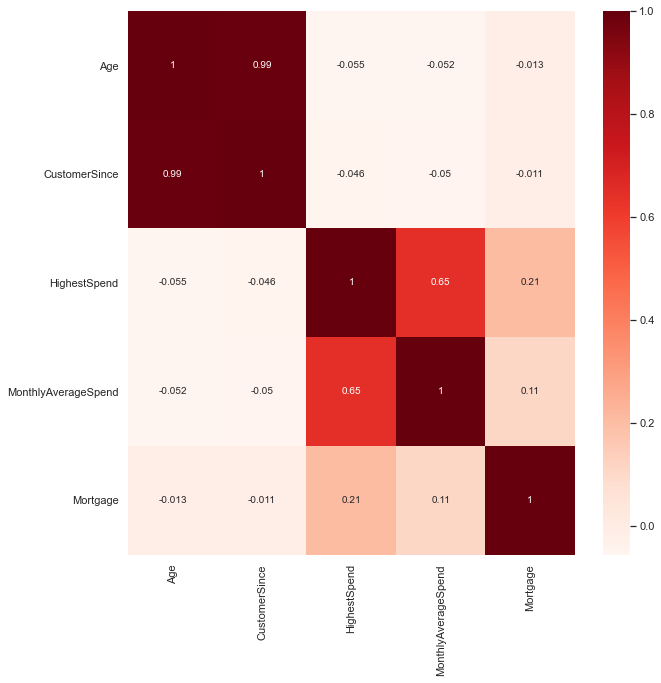

In [11]:
# Displaying the correlation map
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_master.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='Reds', ax=ax)
plt.show()

###### <font color=#B40404>Inference 2: Age and CustomerSince is highly correlated and hence 1 can be dropped. Even Highest Spend and MonthlyAverageSpend has 65% correlation and again one of them may be dropped.

In [12]:
list(df_master.select_dtypes(include=['object']).columns)[:-1]

['HiddenScore',
 'Level',
 'Security',
 'FixedDepositAccount',
 'InternetBanking',
 'CreditCard']

In [13]:
for col in list(df_master.select_dtypes(include=['object']).columns)[:-1]:
    crosstab = pd.crosstab(df_master['LoanOnCard'], df_master[col])
    chi, p_value, dof, expected = chi2_contingency(crosstab)
    print(col)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m', col))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m', col))
    print('\n')

HiddenScore
 Rejecting Null Hypothesis. 
 There is significant difference in HiddenScore Feature for different category of target variable(Loan on card)


Level
 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


Security
 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)


FixedDepositAccount
 Rejecting Null Hypothesis. 
 There is significant difference in FixedDepositAccount Feature for different category of target variable(Loan on card)


InternetBanking
 Fail to Reject Null Hypothesis.
 There is no significant difference in InternetBanking Feature for different category of target variable(Loan on card)


CreditCard
 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)




###### <font color=#B40404>Inference 3: HiddenScore, Level and FixedDepositAccount are categorical variables which have significant influence on the target variable

##### • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

###### <font color=#B40404>Multivariate Analysis of continous variables

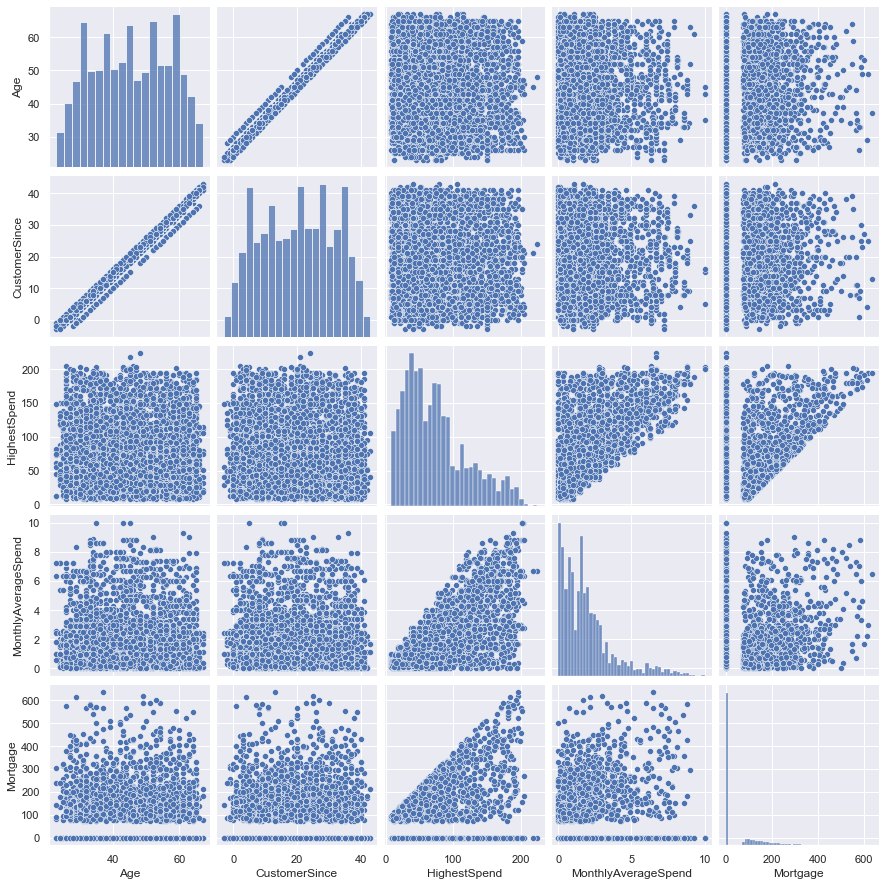

In [14]:
# Multivariate Analysis
sns.pairplot(df_master.select_dtypes(include=['int64','float64']))

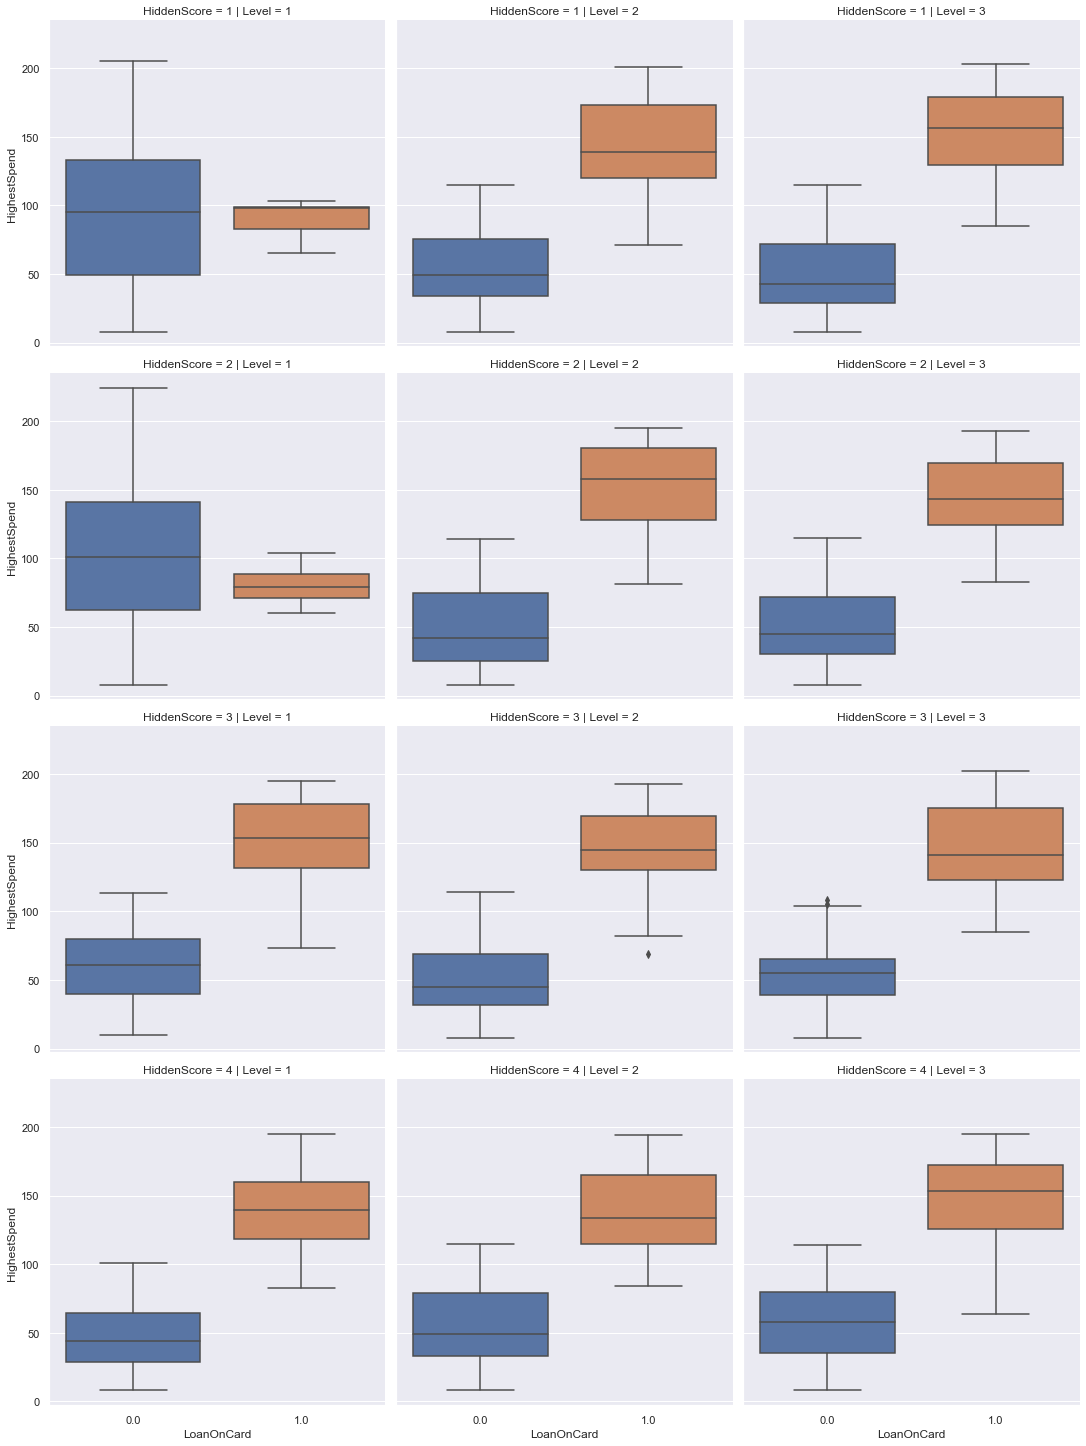

In [15]:
# Multivariate Analysis
sns.catplot(data=df_master,
            row="HiddenScore",
            col="Level",
            y="HighestSpend",
            x="LoanOnCard",
            kind="box"
            )

###### <font color=#B40404>Except for HiddenLevel 1 and 2 for Level 1 all other data distribution's IQR does not overlap

###### <font color=#B40404>Univariate Analysis for outliers in continous variables

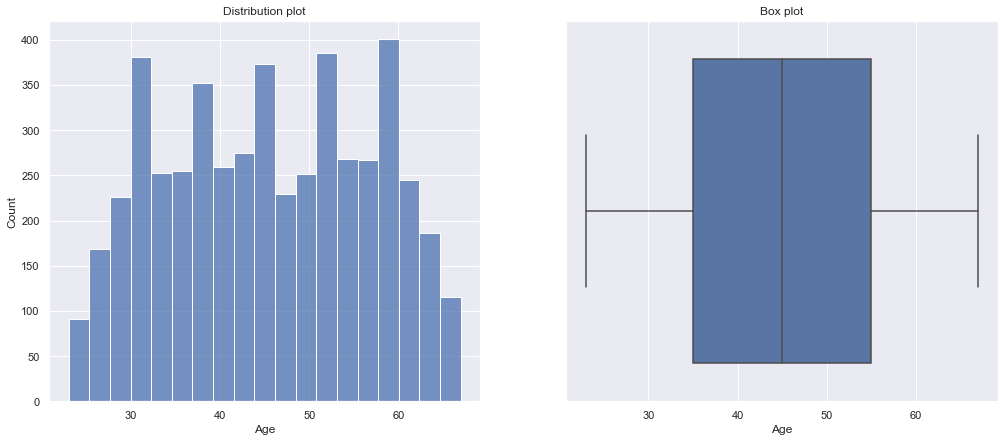

 Total Number of outliers in Age: 0


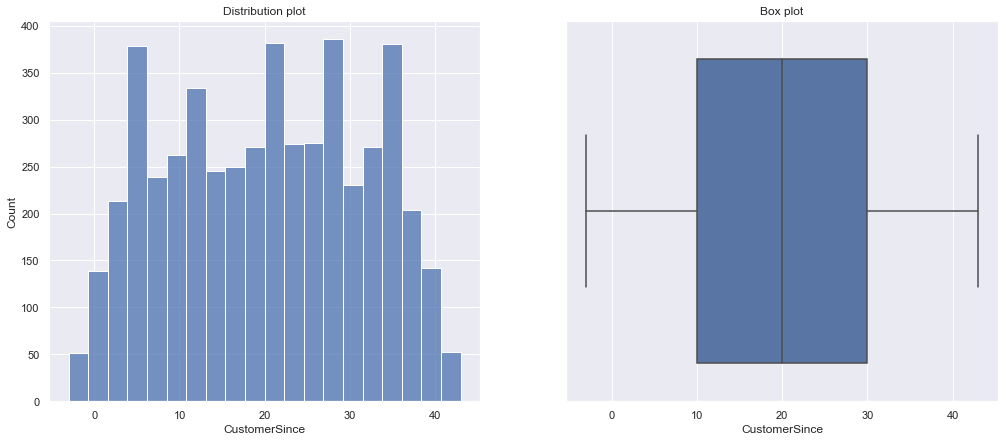

 Total Number of outliers in CustomerSince: 0


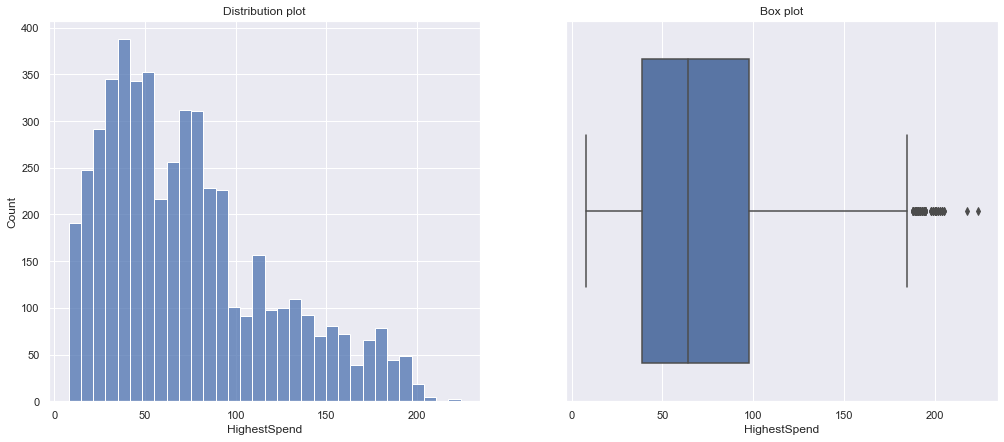

 Total Number of outliers in HighestSpend: 96


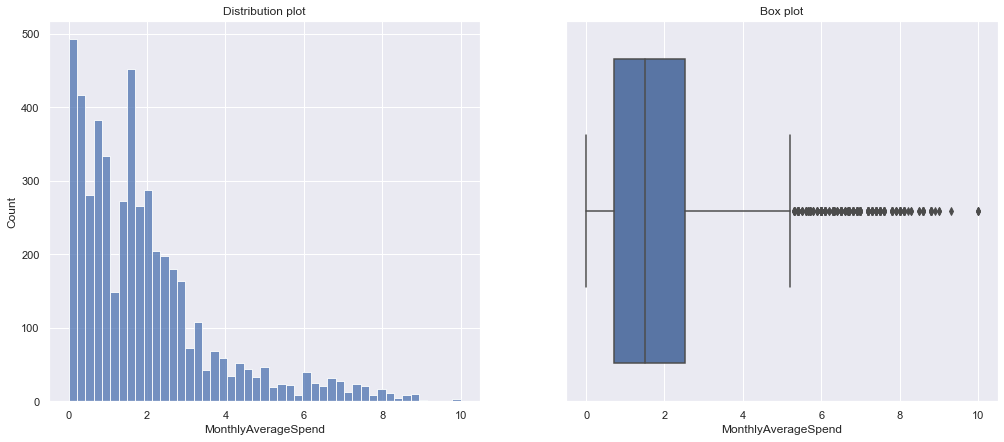

 Total Number of outliers in MonthlyAverageSpend: 324


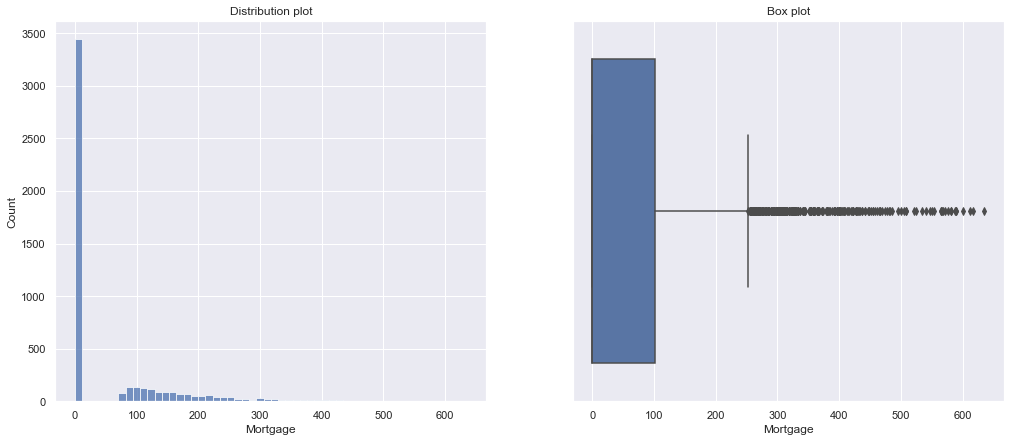

 Total Number of outliers in Mortgage: 291


In [16]:
# Looping through all continous features
for col in list(df_master.select_dtypes(include=['int64','float64']).columns):
    # Display Univariate analysis, Histogram and Boxplot
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = col, data=df_master,  orient='h' , ax=axes[1])
    sns.histplot(df_master[col],  ax=axes[0])
    axes[0].set_title('Distribution plot')
    axes[1].set_title('Box plot')
    plt.show()
    
    # checking count of outliers.
    q25, q75 = np.percentile(df_master[col], 25), np.percentile(df_master[col], 75)
    IQR = q75-q25
    threshold=IQR*1.5
    lower, upper = q25 - threshold, q75 + threshold
    outliers = [i for i in df_master[col] if i < lower or i > upper]
    print('{} Total Number of outliers in {}: {}'.format('\033[1m', col, len(outliers)))

###### <font color=#B40404>Bi-Variate Analysis to see distribution of outlier on different levels of LoanOnCard

<AxesSubplot:xlabel='LoanOnCard', ylabel='HighestSpend'>

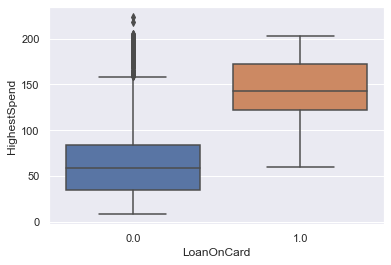

In [17]:
# Display outliers through Bivariate Analysis, boxplot
sns.boxplot(data=df_master, x="LoanOnCard", y="HighestSpend")

<AxesSubplot:xlabel='LoanOnCard', ylabel='Mortgage'>

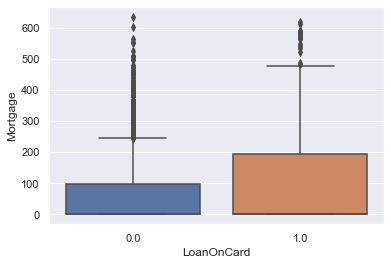

In [18]:
# Display outliers through Bivariate Analysis, boxplot
sns.boxplot(data=df_master, x="LoanOnCard", y="Mortgage")

In [19]:
# Display a crosstab between Target and Credit Card
confusion_matrix(list(df_master["LoanOnCard"]), list(df_master["CreditCard"]))

array([[3177, 1323],
       [ 337,  143]], dtype=int64)

###### <font color=#B40404>There seems to be some records with LoanOnCard without a Credit Card, which would suggest that there are some other features which are missing. Even more importantly most Loans are on these missing features.

#### 4. Data pre-processing:
##### • Segregate predictors vs target attributes

###### <font color=#B40404>Based on Inference 1 and 2 we are going to keep HighestSpend and Mortgage attributes. Although MonthlyAverageSpend is also significant but it has a high correlation with HighestSpend and HighestSpend also has fewer outliers. So we drop MonthlyAverageSpend to reduce repeating the same information.
    
###### <font color=#B40404>Based on Inference 3 we will keep HiddenScore, Level and FixedDepositAccount. However, we will not one hot encode these as HiddenScore and Level seems to be some sort of ranking while FixedDepositAccount is already Binary.

In [20]:
# Segregating all useful variables
X = df_master.loc[:, ["HighestSpend", "Mortgage", "HiddenScore", "Level", "FixedDepositAccount", "LoanOnCard"]].copy()

# Seperating target variable from predictors
y = X.pop("LoanOnCard")

###### <font color=#B40404>Taking care of outliers. We know HighestSpend and Mortgage have some Outliers. Since HighestSpend has less outliers we will remove the outlier records and then cap the Mortgage values to its upper bound.

In [21]:
# Recalculating the Upper bound for Highest Spend
q25, q75 = np.percentile(X["HighestSpend"], 25), np.percentile(X["HighestSpend"], 75)
IQR = q75-q25
threshold=IQR*1.5
upper = q75 + threshold

# Dropping all values higher than upper bound
index = X[X["HighestSpend"]>upper].index
X.drop(index, inplace=True)
y.drop(index, inplace=True)

In [22]:
# Recalculating the Upper bound for Mortgage
q25, q75 = np.percentile(X["Mortgage"], 25), np.percentile(X["Mortgage"], 75)
IQR = q75-q25
threshold=IQR*1.5
upper = q75 + threshold

# Imputing all values higher than upper bound to the upper bound
X.loc[X["Mortgage"]>upper, "Mortgage"] = upper

##### • Check for target balancing and fix it if found imbalanced.

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

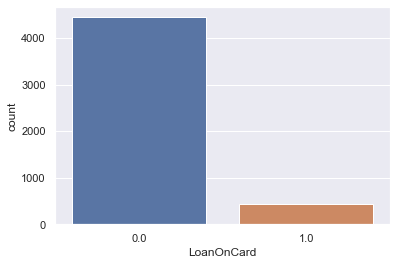

In [23]:
# Checking for imbalance
sns.countplot(x=y)

###### <font color=#B40404>There is a huge imbalance in the number of record in each target variable category. However, we will keep it the way it is for our model and using evaluation metrics which account for the imbalance.

##### • Perform train-test split.

In [24]:
# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Verifying the proportions of y_train and y_test is the same as original dataset
print("y_train proportions")
print(np.unique(y_train, return_counts=True)[1]/len(y_train))

print("y_test proportions")
print(np.unique(y_test, return_counts=True)[1]/len(y_test))

y_train proportions
[0.9104172 0.0895828]
y_test proportions
[0.90992835 0.09007165]


###### <font color=#B40404>Normalising the data using Train values

In [26]:
# Creating StandardScaler object to scale the data
scaler = StandardScaler()

# Fitting StandardScaler object on X_train and transforming both X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 5. Model training, testing and tuning:
##### • Design and train a Logistic regression and Naive Bayes classifiers.

######  <font color=#B40404>Our features have already gone through a shapiro test and hence it is normally distributed. However, for Logistic Regression we have already normalised the data. This does not affect Naive Bayes.

###### <font color=#B40404>Fitting Naive Bayes Classifier

In [27]:
# Converting y values to int type before fitting the Classifiers
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [28]:
# Creating the model
NB_model = GaussianNB()

NB_model.fit(X_train, y_train)

GaussianNB()

###### <font color=#B40404>Fitting Logistic Regression Classifier

In [29]:
# Fit the model on train
lr_model = LogisticRegression(solver="liblinear")
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

##### • Display the classification accuracies for train and test data.

######  <font color=#B40404>Naive Bayes

In [30]:
# Classification accuracy from train data
print("Train Data Accuracy")
print(NB_model.score(X_train, y_train))

# Classification accuracy from test data
print("Test Data Accuracy")
print(NB_model.score(X_test, y_test))

Train Data Accuracy
0.9173278730483747
Test Data Accuracy
0.9222108495394064


######  <font color=#B40404>Logistic Regression

In [31]:
# Classification accuracy from train data
print("Train Data Accuracy")
print(lr_model.score(X_train, y_train))

# Classification accuracy from test data
print("Test Data Accuracy")
print(lr_model.score(X_test, y_test))

Train Data Accuracy
0.9546966982339391
Test Data Accuracy
0.95496417604913


###### <font color=#B40404>Results on test are slightly better in both cases. Metrics suggest a chance of overfitting however, no complex algorithms or regularisation techniques have been used yet, so we can assume that fear of overfitting is not apparent yet. More data will confirm that.

##### • Display and explain the classification report in detail.

###### <font color=#B40404>Naive Bayes

In [32]:
# Create a function which will plot the ROC curve when false positive and true positive rates are fed to it
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [33]:
# Getting the Predictions values
y_pred = NB_model.predict(X_test)

# Creating a confusion matrix and displaying it
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=["T_Depositor", "T_Asset"], columns=["P_Depositor", "P_Asset"])
print(df_cm)
print()

# Calculating Precision, recall and F1 Score
precision = df_cm.iloc[1, 1]/sum(df_cm.iloc[:, 1])
recall = df_cm.iloc[1, 1]/sum(df_cm.iloc[1, :])
f_score = 2 * (precision * recall)/(precision+recall)

print("Precision: {}\nRecall: {}\nF Score: {}".format(precision, recall, f_score))

             P_Depositor  P_Asset
T_Depositor          855       34
T_Asset               42       46

Precision: 0.575
Recall: 0.5227272727272727
F Score: 0.5476190476190476


###### <font color=#B40404>Logistic Regression

In [34]:
# Getting the Predictions values
y_pred = lr_model.predict(X_test)

# Creating a confusion matrix and displaying it
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=["T_Depositor", "T_Asset"], columns=["P_Depositor", "P_Asset"])
print(df_cm)
print()

# Calculating Precision, recall and F1 Score
precision = df_cm.iloc[1, 1]/sum(df_cm.iloc[:, 1])
recall = df_cm.iloc[1, 1]/sum(df_cm.iloc[1, :])
f_score = 2 * (precision * recall)/(precision+recall)

print("Precision: {}\nRecall: {}\nF Score: {}".format(precision, recall, f_score))

             P_Depositor  P_Asset
T_Depositor          881        8
T_Asset               36       52

Precision: 0.8666666666666667
Recall: 0.5909090909090909
F Score: 0.7027027027027029


##### • Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.

###### <font color=#B40404>Naive Bayes

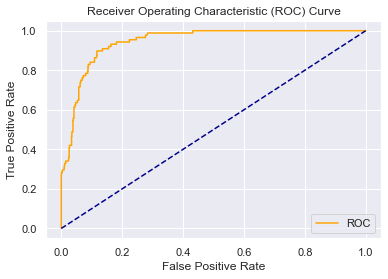

Area under the curve:  0.9445559361897945


In [35]:
# Loading the probability values for positive class
y_prob = NB_model.predict_proba(X_test)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

Area under the curve:  0.9445559361897945
Best Threshold=0.197188, F-Score=0.626


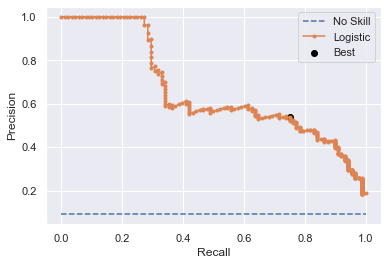

In [36]:
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

# Calculating the Precision, Recall and the threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate the f score for all threshold values
fscore = (2 * precision * recall) / (precision + recall)

# Locate the index of the largest f score
ix = np.argmax(fscore)

# Display the Best cutoff point based on the best f score
print('Best Threshold=%f, F-Score=%.3f' %(thresholds[ix], fscore[ix]))

# Plot the precision-recall curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [37]:
# Create and display the dataframe of all metric values
df_scores_NB = pd.DataFrame({'precision' : pd.Series(precision),
                    'recall' : pd.Series(recall), 
                    'fscore' : pd.Series(fscore), 
                    'thresholds' : pd.Series(thresholds)})
df_scores_NB

,precision,recall,fscore,thresholds
0,0.186441,1.000000,0.314286,0.002043
1,0.184713,0.988636,0.311270,0.002054
2,0.185106,0.988636,0.311828,0.002059
3,0.185501,0.988636,0.312388,0.002064
4,0.185897,0.988636,0.312950,0.002076
...,...,...,...,...
398,1.000000,0.045455,0.086957,0.999999
399,1.000000,0.034091,0.065934,0.999999
400,1.000000,0.022727,0.044444,0.999999
401,1.000000,0.011364,0.022472,0.999999


###### <font color=#B40404>Highest F score for Naive Bayes is at 0.626 at cutoff 0.197188

In [38]:
# Displaying the resulting confusion Matrix at best f score cutoff

threshold = thresholds[ix]
df_cm = pd.DataFrame(confusion_matrix(y_test, list(map(lambda x: 1 if x >= threshold else 0, y_prob))), 
             index=["T_Depositor", "T_Asset"], columns=["P_Depositor", "P_Asset"])
df_cm

,P_Depositor,P_Asset
T_Depositor,832,57
T_Asset,22,66


###### <font color=#B40404>Logistic Regression

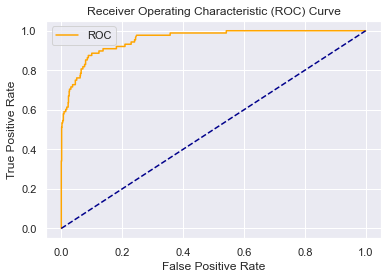

Area under the curve:  0.9563413948256468


In [39]:
# Loading the probability values for positive class
y_prob = lr_model.predict_proba(X_test)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

Best Threshold=0.311609, F-Score=0.713


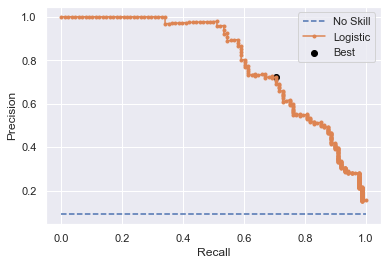

In [40]:
# Calculating the Precision, Recall and the threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate the f score for all threshold values
fscore = (2 * precision * recall) / (precision + recall)

# Locate the index of the largest f score
ix = np.argmax(fscore)

# Display the Best cutoff point based on the best f score
print('Best Threshold=%f, F-Score=%.3f' %(thresholds[ix], fscore[ix]))

# Plot the precision-recall curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [41]:
# Create and display the dataframe of all values
df_scores_lr = pd.DataFrame({'precision' : pd.Series(precision),
                    'recall' : pd.Series(recall), 
                    'fscore' : pd.Series(fscore), 
                    'thresholds' : pd.Series(thresholds)})
df_scores_lr

,precision,recall,fscore,thresholds
0,0.154386,1.000000,0.267477,0.003951
1,0.152900,0.988636,0.264840,0.003986
2,0.153169,0.988636,0.265244,0.003998
3,0.153710,0.988636,0.266055,0.004053
4,0.153982,0.988636,0.266462,0.004068
...,...,...,...,...
476,1.000000,0.045455,0.086957,0.993338
477,1.000000,0.034091,0.065934,0.994909
478,1.000000,0.022727,0.044444,0.996234
479,1.000000,0.011364,0.022472,0.997653


###### <font color=#B40404>Highest F score for Logistic Regression is at 0.713 at cutoff 0.311609

In [42]:
# Displaying the resulting confusion Matrix at best f score cutoff

threshold = thresholds[ix]
df_cm = pd.DataFrame(confusion_matrix(y_test, list(map(lambda x: 1 if x >= threshold else 0, y_prob))), 
             index=["T_Depositor", "T_Asset"], columns=["P_Depositor", "P_Asset"])
df_cm

,P_Depositor,P_Asset
T_Depositor,865,24
T_Asset,26,62


###### <font color=#B40404>The final best model is chosen based on the highest f score. So we choose Logistic Regression with cutoff at 0.311609, so as catch the best precision vs recall trade off

#### 6. Conclusion and improvisation:
##### • Write your conclusion on the results.

###### <font color=#B40404>My Conclusion on the results is that we could further work on other types of model and hyperparameters to get a better model, but results of Logistic Regression is already quite impressive and we may take it to production.
###### <font color=#B40404>From the coefficients of Logistic Regression Model we can also assess that HighestSpend can be used to identify Asset clients way better than Mortgage. Higher the Level of a Customer twice more likely is he to be an Asset Client than the his HiddenScore. HiddenScore is also 1.5 times more relevant identifier for an asset client than the client having a FixedDepositAccount.

In [43]:
# Displaying the coefficients of the final Logistic Model created for analysis
print("HighestSpend, Mortgage, HiddenScore, Level, FixedDepositAccount, intercept")
print(lr_model.coef_, lr_model.intercept_)

HighestSpend, Mortgage, HiddenScore, Level, FixedDepositAccount, intercept
[[2.73608341 0.00857011 0.79208047 1.35322506 0.54290468]] [-4.73094267]


##### • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

###### <font color=#B40404>The data raises a few questions like, why are some Customer Since records negative. Why were some target values Null, what information did we lose because of that. Analysis pointed out that there are other ways to get a LoanOnCard apart from having a CreditCard, so where are these attributes? Finally if some people earlier had a Card but now do not, then can we have the historical data as well. As always more data and more information is great.